In [58]:
# Brendan Dasilva
# 101447806
# Assignment 2

In [60]:
# Part B

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [64]:
# Step 1 - Gather and clean the data

# import the dataset from covid_dataset.csv
data = np.genfromtxt('covid_dataset.csv', delimiter=',', skip_header=1)

In [109]:
# print the feature names and target name
with open('covid_dataset.csv', 'r') as f:
    header = f.readline().strip().split(',')
    feature_names = header[:-1]  # all columns except the last one are features
    target_name = header[-1]  # the last column is the target
    print("Feature Names:", feature_names)
    print("Target Name:", target_name)

Feature Names: ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue', 'Gastrointestinal']
Target Name: COVID-19


In [111]:
# print the first 5 rows
print("First 5 rows of the dataset:")
print(data[:5])

First 5 rows of the dataset:
[[1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [72]:
X = data[:, :-1] # all rows except the last one (features)
y = data[:, -1] # only the last column (targets)

In [74]:
print(X)
print(y)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [113]:
# Step 2 - Train the ML alg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
# more information on the data: shape and sample sizes
print(f"The shape of X is (rows, columns): {X.shape}")
print(f"The shape of y is (rows, no columns): {y.shape}")
print(f"The training size: {len(X_train)} samples")
print(f"The set size: {len(X_test)} samples")

The shape of X is (rows, columns): (151, 13)
The shape of y is (rows, no columns): (151,)
The training size: 105 samples
The set size: 46 samples


In [117]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
# Step 3 - Test the model 

print("Predictions on test data:", y_pred_tree)
print("Actual values:", y_test)

Predictions on test data: [0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
Actual values: [1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.]


In [121]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

Decision Tree Accuracy: 0.98


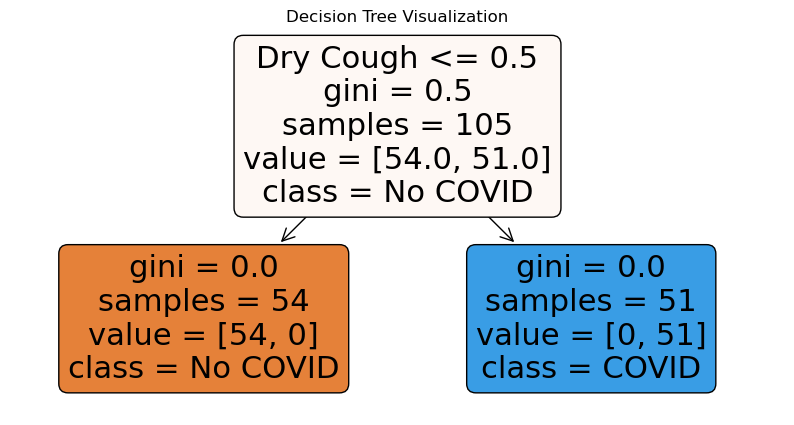

In [97]:
# Step 4 - Visualize the data given by the ML test

plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=['No COVID', 'COVID'])
plt.title('Decision Tree Visualization')
plt.show()